<a href="https://colab.research.google.com/github/puneethraj28/Data_Science_DLithe-/blob/main/DataScience_Internship_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Car details v3.csv')

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
df.shape

(8128, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [12]:
print(df.name.value_counts())
print(df.fuel.value_counts())
print(df.seller_type.value_counts())

Maruti Swift Dzire VDI                    129
Maruti Alto 800 LXI                        82
Maruti Alto LXi                            71
BMW X4 M Sport X xDrive20d                 62
Maruti Swift VDI                           61
                                         ... 
Datsun RediGO Sport                         1
Mahindra Scorpio Intelli Hybrid S10         1
Hyundai i20 Asta (o) 1.4 CRDi (Diesel)      1
Nissan Micra Active XV                      1
Toyota Corolla Altis Diesel D4DJ            1
Name: name, Length: 2058, dtype: int64
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64


In [14]:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [16]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
X = df.drop(['name','selling_price'],axis=1)
Y = df['selling_price']

In [19]:
print(X)

      year  km_driven fuel  ...   max_power                     torque seats
0     2014     145500    1  ...      74 bhp             190Nm@ 2000rpm   5.0
1     2014     120000    1  ...  103.52 bhp        250Nm@ 1500-2500rpm   5.0
2     2006     140000    0  ...      78 bhp      12.7@ 2,700(kgm@ rpm)   5.0
3     2010     127000    1  ...      90 bhp   22.4 kgm at 1750-2750rpm   5.0
4     2007     120000    0  ...    88.2 bhp      11.5@ 4,500(kgm@ rpm)   5.0
...    ...        ...  ...  ...         ...                        ...   ...
8123  2013     110000    0  ...   82.85 bhp           113.7Nm@ 4000rpm   5.0
8124  2007     119000    1  ...     110 bhp  24@ 1,900-2,750(kgm@ rpm)   5.0
8125  2009     120000    1  ...    73.9 bhp             190Nm@ 2000rpm   5.0
8126  2013      25000    1  ...      70 bhp        140Nm@ 1800-3000rpm   5.0
8127  2013      25000    1  ...      70 bhp        140Nm@ 1800-3000rpm   5.0

[8128 rows x 11 columns]


In [20]:
print(Y)


0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split

In [32]:
labels = df[['selling_price']]
labels.head()

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000


In [60]:
features = df[['km_driven','seats']]
features.head()

,km_driven,seats
0,145500,5.0
1,120000,5.0
2,140000,5.0
3,127000,5.0
4,120000,5.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15)

In [62]:
X_train.shape, X_test.shape

((6908, 2), (1220, 2))

In [63]:
y_train.shape, y_test.shape

((6908, 1), (1220, 1))

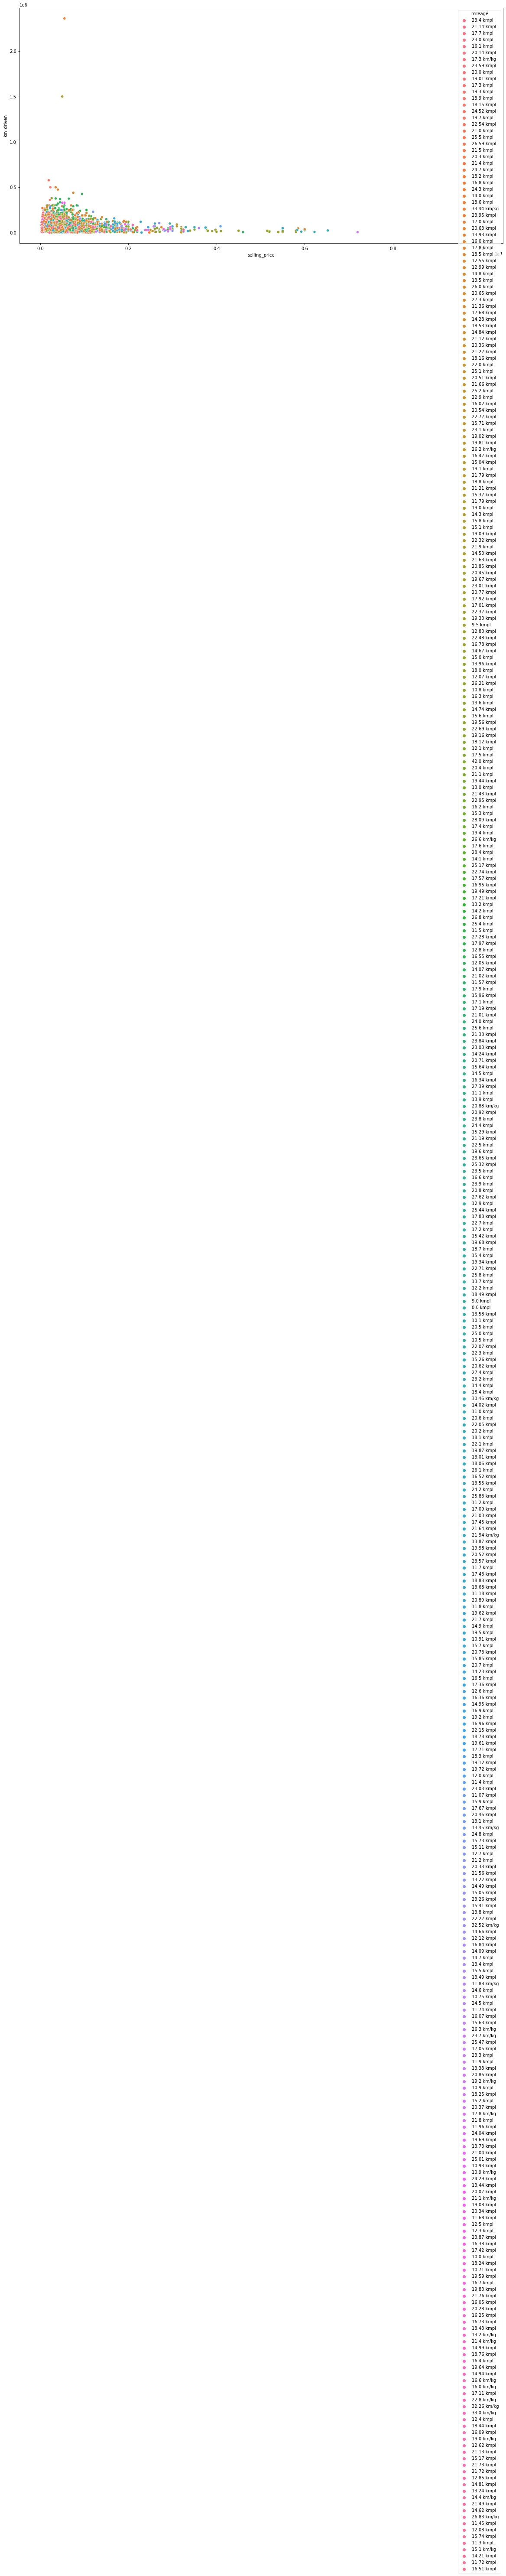

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x="selling_price", y="km_driven", hue='mileage', data=df, ax=ax)
plt.show()

In [79]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


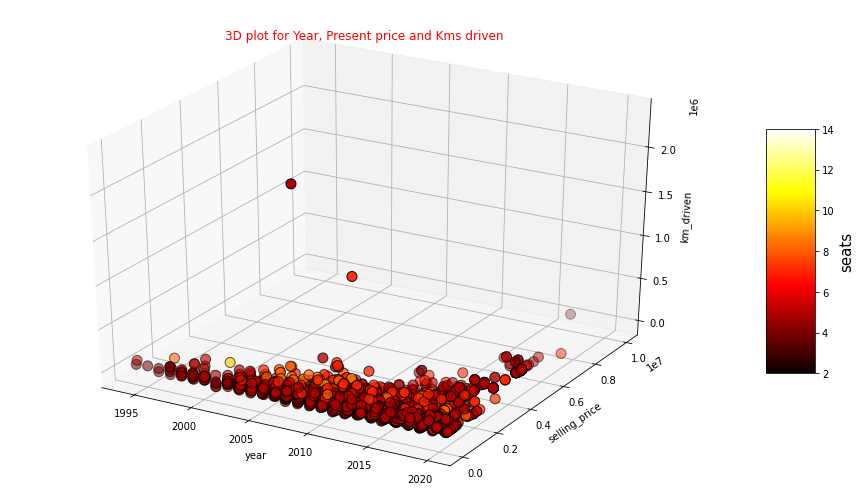

In [82]:
fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

# using scatter plot

plot =  ax.scatter(df["year"],
           df["selling_price"],
           df["km_driven"],
           linewidth=1,edgecolor ="k",
           c=df["seats"],s=100,cmap="hot")

ax.set_xlabel("year")
ax.set_ylabel("selling_price")
ax.set_zlabel("km_driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("seats",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()

In [84]:
x = df.corr().sort_values(by="selling_price", ascending=False)
print(x['selling_price'])

selling_price    1.000000
year             0.414092
seats            0.041358
km_driven       -0.225534
Name: selling_price, dtype: float64


In [85]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [86]:
X
y

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
df["selling_price"].mean()

638271.8077017716

In [100]:
df["selling_price"].std()

806253.4035082331

In [102]:
df1=df["fuel"].value_counts()
df1

1      4402
0      3631
2        57
LPG      38
Name: fuel, dtype: int64

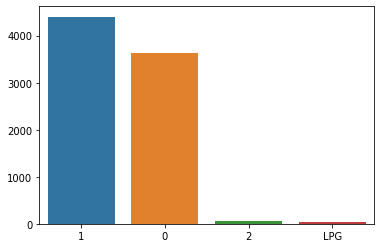

In [103]:
sns.barplot(x=df1.index,y=df1.values)

In [105]:
df2=df["owner"].value_counts()
df2

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

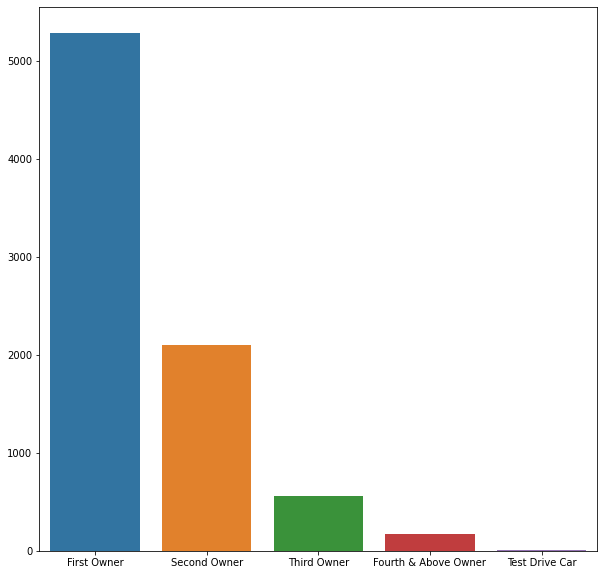

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(x=df2.index,y=df2.values)

In [107]:
df3=df["transmission"].value_counts()
df3

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

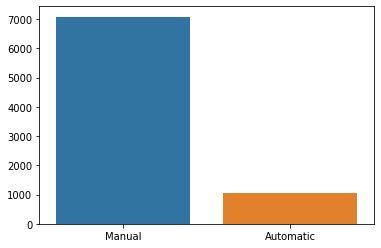

In [108]:
sns.barplot(x=df3.index,y=df3.values)

In [110]:
df["brand"]=df["name"][0]

In [112]:
for i in range(4340):
    df["brand"][i]=df["name"][i].split()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
df["brand"].value_counts()

Maruti Swift Dzire VDI    3788
Maruti                    1299
Hyundai                    768
Mahindra                   437
Tata                       391
Toyota                     278
Honda                      240
Ford                       202
Chevrolet                  124
Renault                    114
Volkswagen                  77
BMW                         65
Nissan                      50
Skoda                       46
Jaguar                      43
Volvo                       42
Datsun                      34
Mercedes-Benz               25
Fiat                        24
Lexus                       22
Audi                        19
Jeep                        15
Mitsubishi                   7
Land                         3
Daewoo                       3
MG                           3
Kia                          3
Force                        3
Isuzu                        1
Ashok                        1
Ambassador                   1
Name: brand, dtype: int64

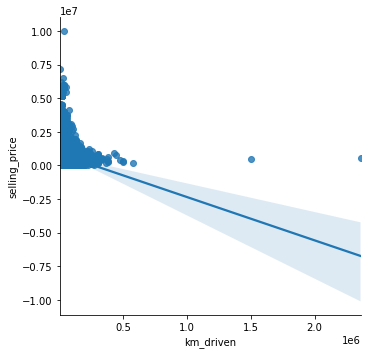

In [115]:
sns.lmplot(x='km_driven',y='selling_price',data=df)
#selling price reduces based on km driven

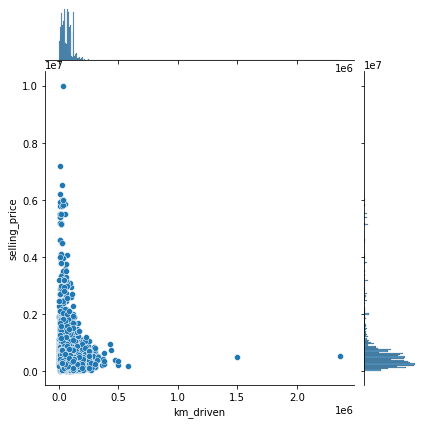

In [116]:
sns.jointplot(x='km_driven',y='selling_price',data=df)

In [118]:
df[df["selling_price"]==df["selling_price"].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,0,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0,Volvo


In [120]:
df[df["selling_price"]==df["selling_price"].min()]
#cheapest car's details

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
5714,Maruti 800 AC,1997,29999,80000,0,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,Maruti Swift Dzire VDI


In [121]:
df[df["year"]==df["year"].min()]
#oldest car's details

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
316,Mahindra Willys CJ 3B 4X4,1983,300000,10000,1,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,Mahindra


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50ee14c510>,
      dtype=object)

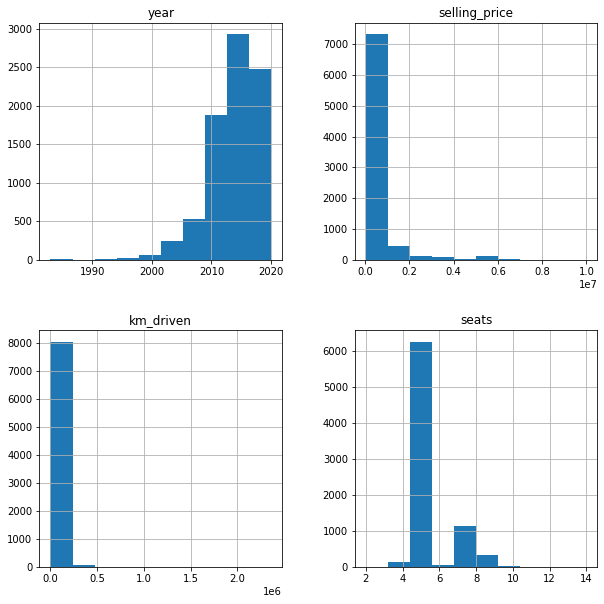

In [122]:
df.hist(figsize=(10,10))
#distribution of the data

In [123]:
df11=df.drop(["seller_type","transmission","owner"],axis=1,inplace=False)

In [124]:
df11

,name,year,selling_price,km_driven,fuel,mileage,engine,max_power,torque,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,0,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Maruti Swift Dzire VDI
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Maruti Swift Dzire VDI
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti Swift Dzire VDI
8126,Tata Indigo CR4,2013,290000,25000,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Maruti Swift Dzire VDI


In [125]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'brand'],
      dtype='object')

In [127]:
branddf=df.groupby(by='brand')

In [128]:
branddf.mean()["selling_price"]
#brands by average selling price

brand
Ambassador                7.500000e+04
Ashok                     3.000000e+05
Audi                      2.360789e+06
BMW                       4.360538e+06
Chevrolet                 2.563145e+05
Daewoo                    7.700000e+04
Datsun                    3.070588e+05
Fiat                      3.081250e+05
Force                     1.003333e+06
Ford                      5.129604e+05
Honda                     5.890756e+05
Hyundai                   4.539322e+05
Isuzu                     2.700000e+06
Jaguar                    2.914581e+06
Jeep                      2.311067e+06
Kia                       1.481000e+06
Land                      3.550000e+06
Lexus                     5.150000e+06
MG                        1.783333e+06
Mahindra                  6.073066e+05
Maruti                    3.983442e+05
Maruti Swift Dzire VDI    6.304328e+05
Mercedes-Benz             2.530160e+06
Mitsubishi                9.114286e+05
Nissan                    4.505400e+05
Renault            

In [129]:
branddf.mean()["selling_price"].idxmin()
#cheapest car brand on average

'Ambassador'

In [130]:
branddf.mean()["selling_price"].idxmax()
#most expensive car brand on average-landrover

'Lexus'

In [132]:
df[(df['transmission']=='Automatic') & (df['fuel']=="Diesel")].count()["name"]
#number of diesel automatics

0